In [ ]:
# codes of model training

In [2]:
import os
import numpy as np
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to read and preprocess images
def load_and_preprocess_images(folder_path):
    images = []
    labels = []
    
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = io.imread(img_path)
            
            # Preprocess the image (you may need to adjust this based on your images)
            img = transform.resize(color.rgb2gray(img), (64, 64))
            
            images.append(img.flatten())  # Flatten the image into a 1D array
            labels.append(label)
    
    return np.array(images), np.array(labels)

# Function to train and evaluate Random Forest
def train_and_evaluate_random_forest(images, labels, n_estimators=100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    
    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the classifier
    rf_classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)
    
    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

# Replace 'your_folder_path' with the path to your dataset
folder_path = 'aug_resized_images2'

# Load and preprocess images
images, labels = load_and_preprocess_images(folder_path)

# Train and evaluate Random Forest
train_and_evaluate_random_forest(images, labels, n_estimators=100)

Accuracy: 92.52%


In [1]:
import os
import numpy as np
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib  # Import joblib for saving the model

# Function to read and preprocess images
def load_and_preprocess_images(folder_path):
    images = []
    labels = []
    
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = io.imread(img_path)
            
            # Preprocess the image (you may need to adjust this based on your images)
            img = transform.resize(color.rgb2gray(img), (64, 64))
            
            images.append(img.flatten())  # Flatten the image into a 1D array
            labels.append(label)
    
    return np.array(images), np.array(labels)

# Function to train and evaluate Random Forest
def train_and_evaluate_random_forest(images, labels, n_estimators=100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    
    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the classifier
    rf_classifier.fit(X_train, y_train)
    
    # Save the trained Random Forest model as a pickle file
    model_filename = 'random_forest_model.pkl'
    joblib.dump(rf_classifier, model_filename)
    print(f"Trained Random Forest model saved as {model_filename}")
    
    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)
    
    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

# Replace 'your_folder_path' with the path to your dataset
folder_path = 'aug_resized_images2'

# Load and preprocess images
images, labels = load_and_preprocess_images(folder_path)

# Train and evaluate Random Forest, and save the model as a pkl file
train_and_evaluate_random_forest(images, labels, n_estimators=100)


Trained Random Forest model saved as random_forest_model.pkl
Accuracy: 92.28%


Trained Random Forest model saved as random_forest_model.pkl
Accuracy: 92.28%
Accuracy: 92.28%


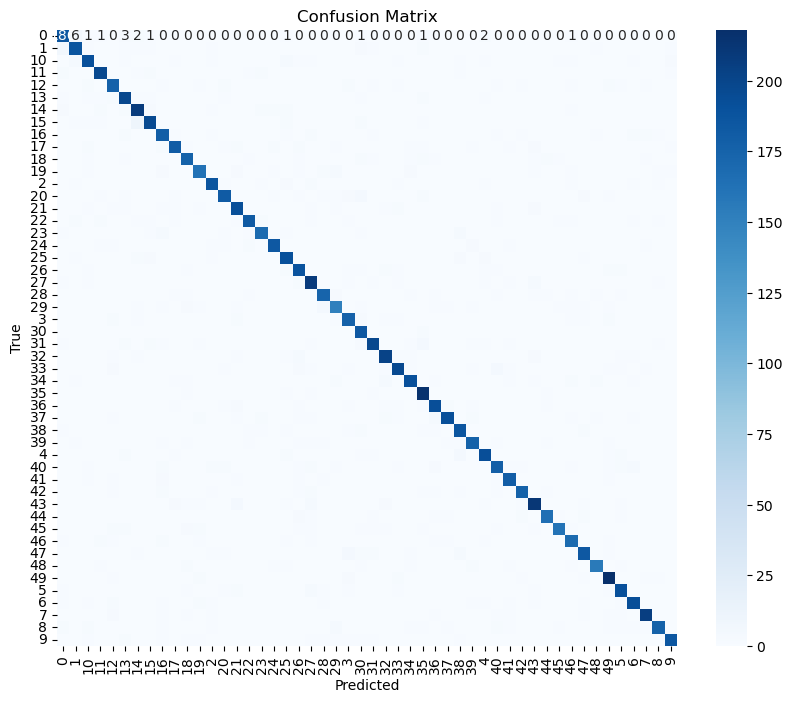

In [1]:
import os
import numpy as np
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and preprocess images
def load_and_preprocess_images(folder_path):
    images = []
    labels = []
    
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = io.imread(img_path)
            
            # Preprocess the image (you may need to adjust this based on your images)
            img = transform.resize(color.rgb2gray(img), (64, 64))
            
            images.append(img.flatten())  # Flatten the image into a 1D array
            labels.append(label)
    
    return np.array(images), np.array(labels)

# Function to train and evaluate Random Forest
def train_and_evaluate_random_forest(images, labels, n_estimators=100):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
    
    # Initialize the Random Forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    
    # Train the classifier
    rf_classifier.fit(X_train, y_train)
    
    # Save the trained Random Forest model as a pickle file
    model_filename = 'random_forest_model.pkl'
    joblib.dump(rf_classifier, model_filename)
    print(f"Trained Random Forest model saved as {model_filename}")
    
    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)
    
    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)
    
    # Print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels), yticklabels=np.unique(labels))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# Replace 'your_folder_path' with the path to your dataset
folder_path = 'aug_resized_images2'

# Load and preprocess images
images, labels = load_and_preprocess_images(folder_path)

# Train and evaluate Random Forest, and plot confusion matrix heatmap
train_and_evaluate_random_forest(images, labels)
